## Density Models Assignment

In [4]:
# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

#import numpy
import numpy as np

# from sklearn import make_blobs
from sklearn.datasets import make_blobs

# import DBSCAN
from sklearn.cluster import DBSCAN

## Task: Generate clusters with make_blobs function 

Use the following settings:
   * n_samples=150,
   * n_features=2,
   * centers=3,
   * cluster_std=0.6,
   * random_state=0

In [5]:
X, y = make_blobs(n_samples=150,
                    n_features=2,
                    centers=3,
                    cluster_std=0.5,
                    random_state=0)

* plot data points

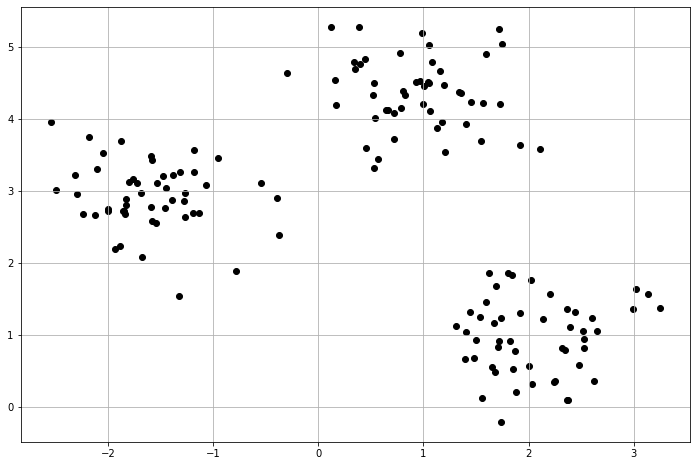

In [11]:

plt.scatter(X[:,0],
            X[:,1],
            c='black',
            marker='o')

plt.grid()
plt.show()


* define function plot_clusters

In [48]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label=f'centroids')
    plt.legend()
    plt.grid()
    plt.show()

## Objective: 
Try to find optimal settings of `eps` and `min_samples` params of DBSCAN. You can iterate over multiple parameters combinations and plot the clustering results.

* define params space: two lists with `eps` and `min_samples` respectively

In [66]:
eps_list = list(np.linspace(0.2,1,5))
print(eps_list)

min_samples = list(np.linspace(2,10,5, dtype=int))
print(min_samples)

[0.2, 0.4, 0.6000000000000001, 0.8, 1.0]
[2, 4, 6, 8, 10]


* combinations (hint: use 'product' function from 'itertools')

In [67]:
from itertools import product

# use product to make list of tuples

combinations = list(product(eps_list,min_samples))
combinations

[(0.2, 2),
 (0.2, 4),
 (0.2, 6),
 (0.2, 8),
 (0.2, 10),
 (0.4, 2),
 (0.4, 4),
 (0.4, 6),
 (0.4, 8),
 (0.4, 10),
 (0.6000000000000001, 2),
 (0.6000000000000001, 4),
 (0.6000000000000001, 6),
 (0.6000000000000001, 8),
 (0.6000000000000001, 10),
 (0.8, 2),
 (0.8, 4),
 (0.8, 6),
 (0.8, 8),
 (0.8, 10),
 (1.0, 2),
 (1.0, 4),
 (1.0, 6),
 (1.0, 8),
 (1.0, 10)]

- fit DBSCAN for each combinations and plot the results

0.2 2


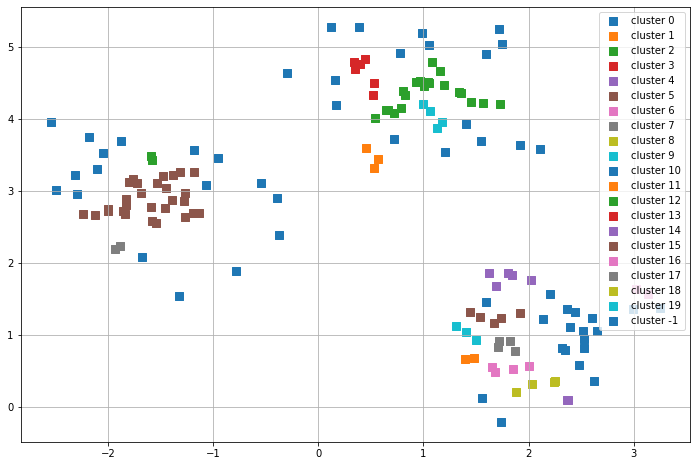

0.2 4


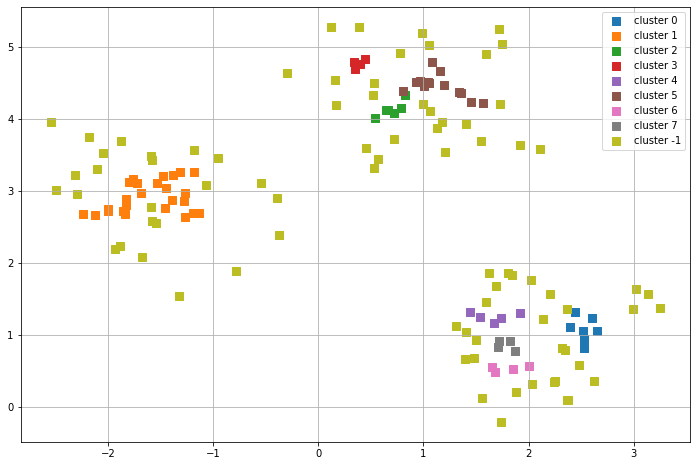

0.2 6


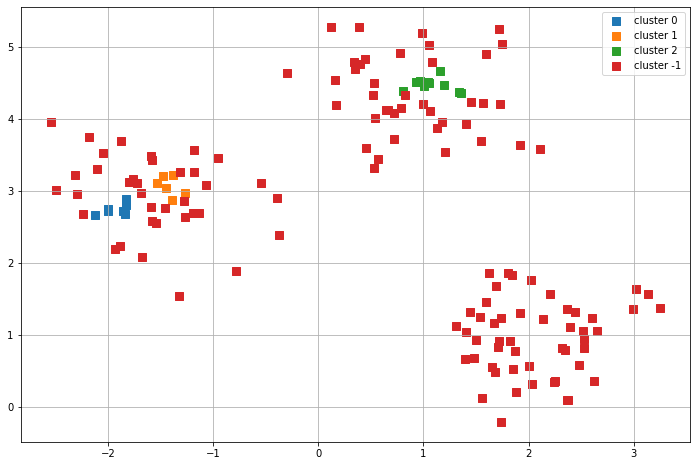

0.2 8


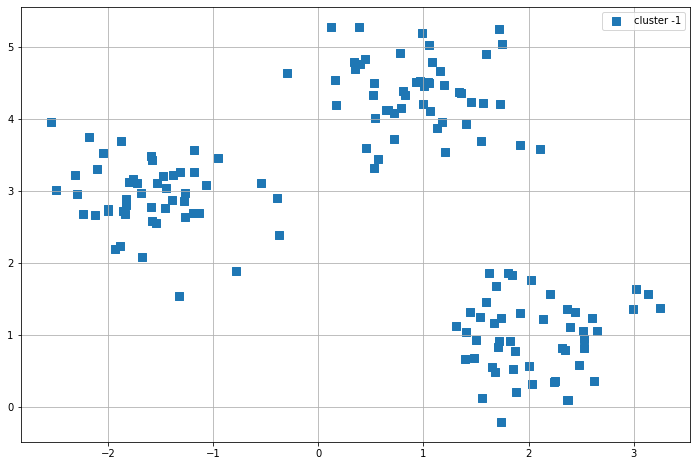

0.2 10


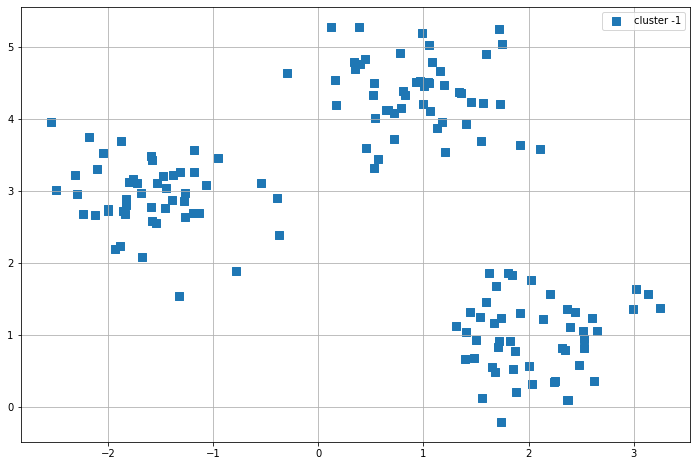

0.4 2


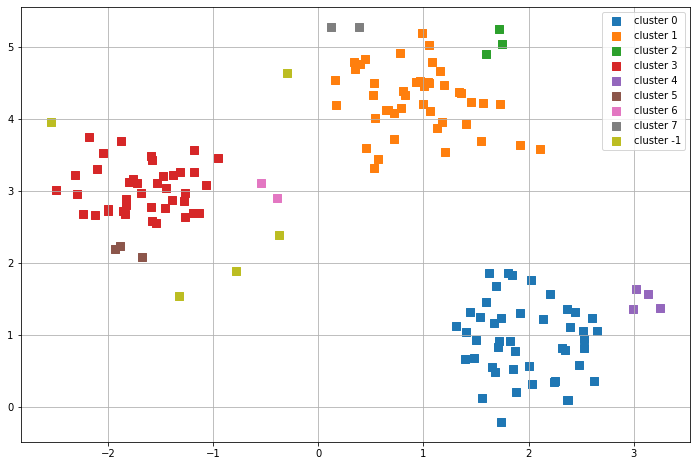

0.4 4


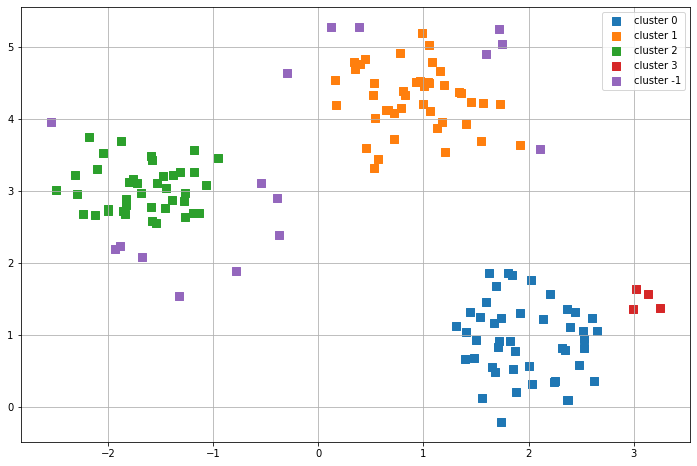

0.4 6


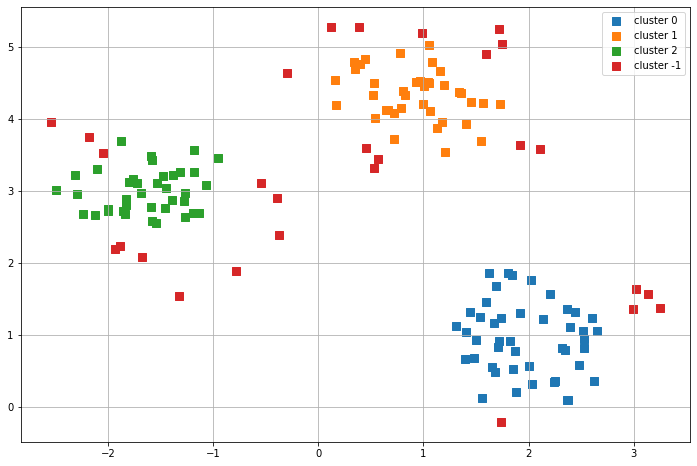

0.4 8


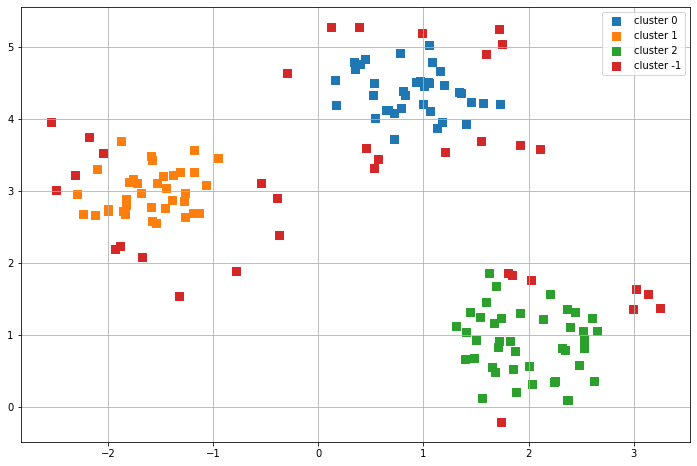

0.4 10


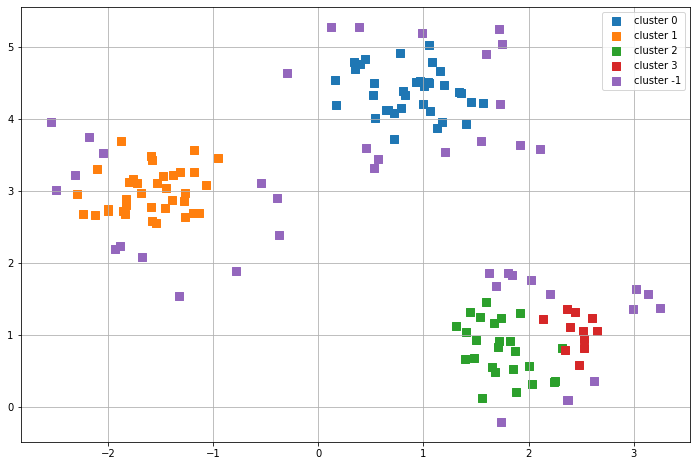

0.6000000000000001 2


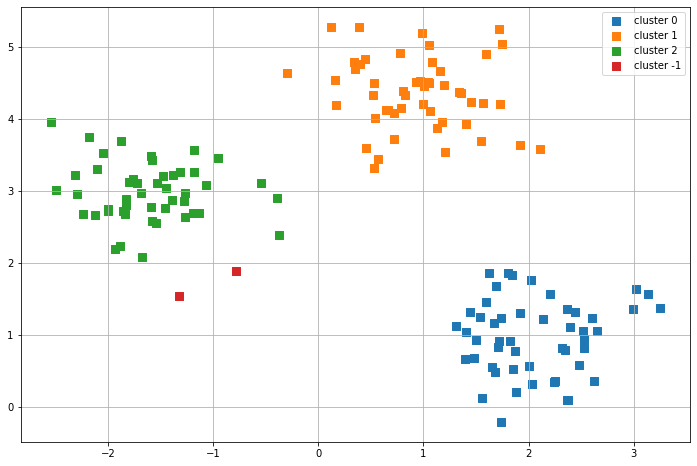

0.6000000000000001 4


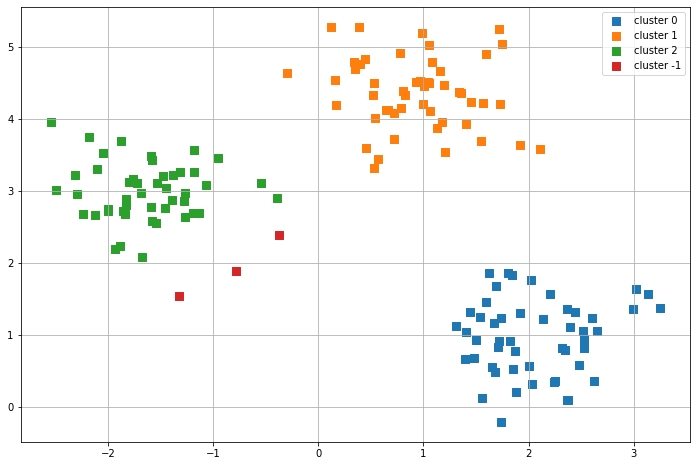

0.6000000000000001 6


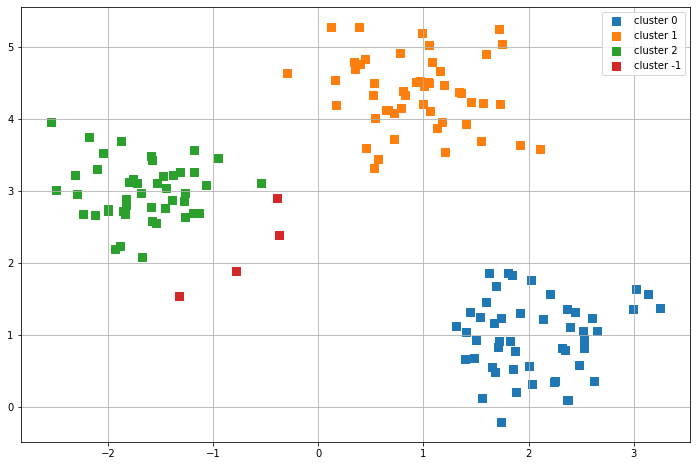

0.6000000000000001 8


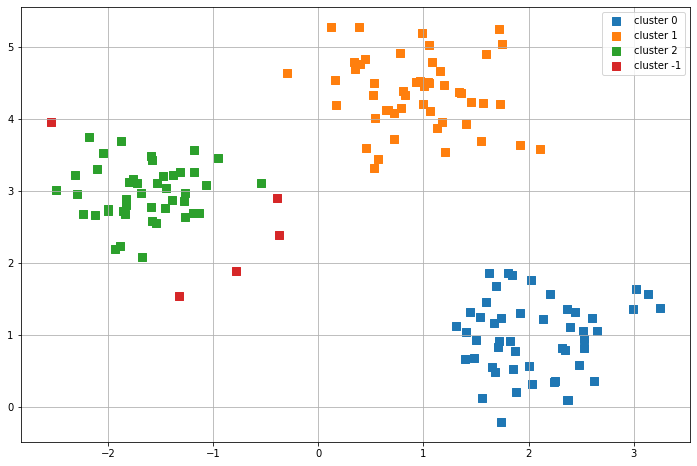

0.6000000000000001 10


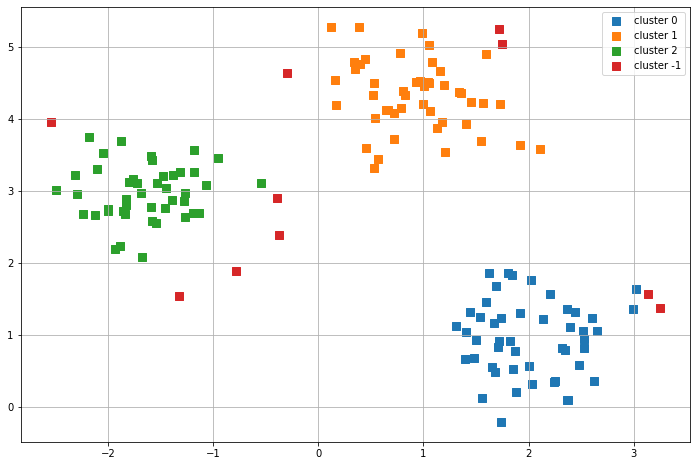

0.8 2


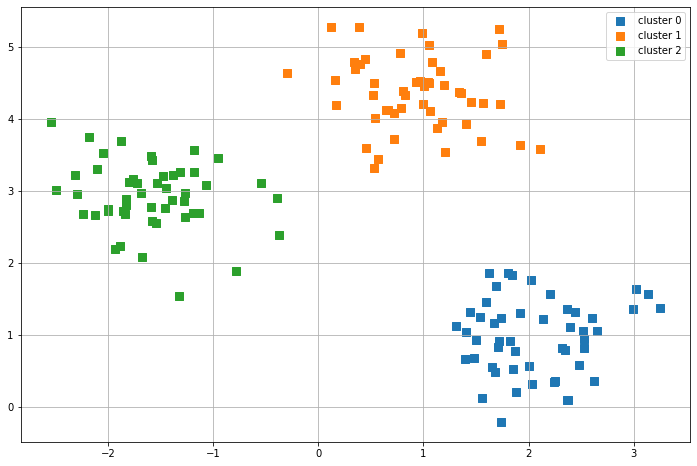

0.8 4


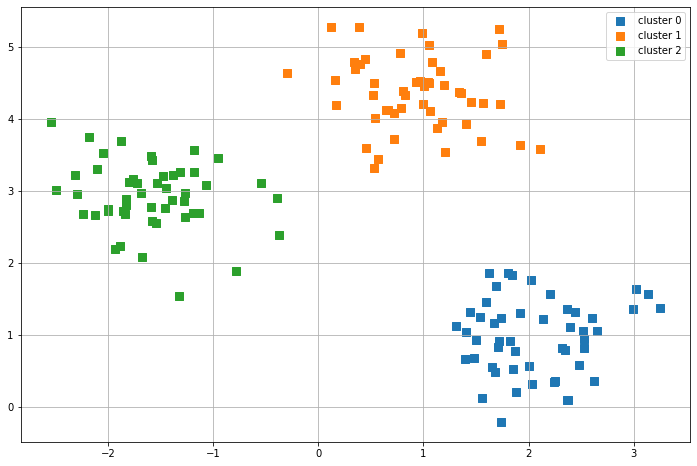

0.8 6


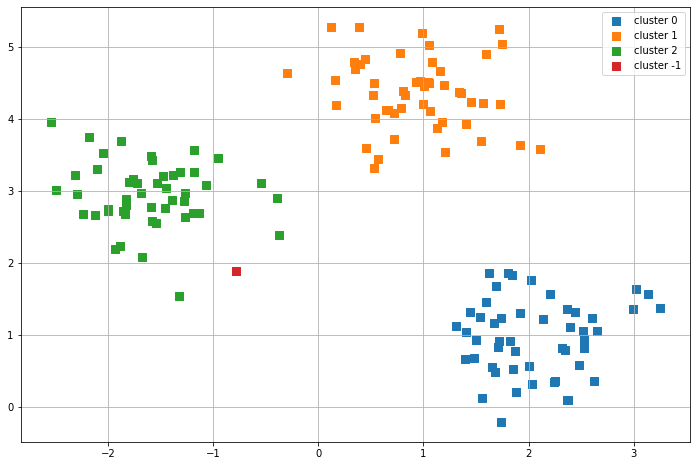

0.8 8


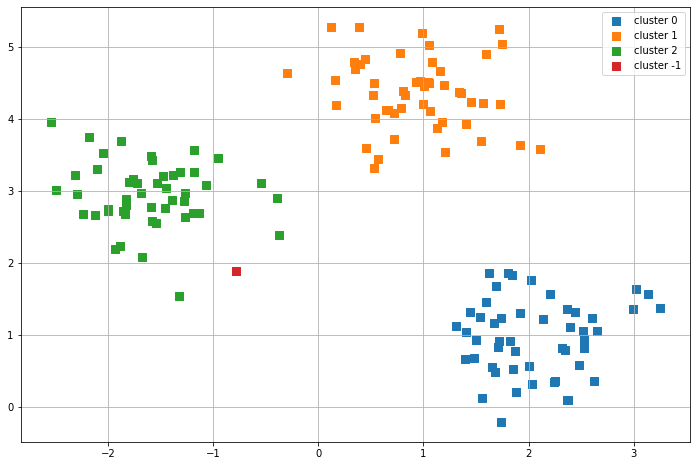

0.8 10


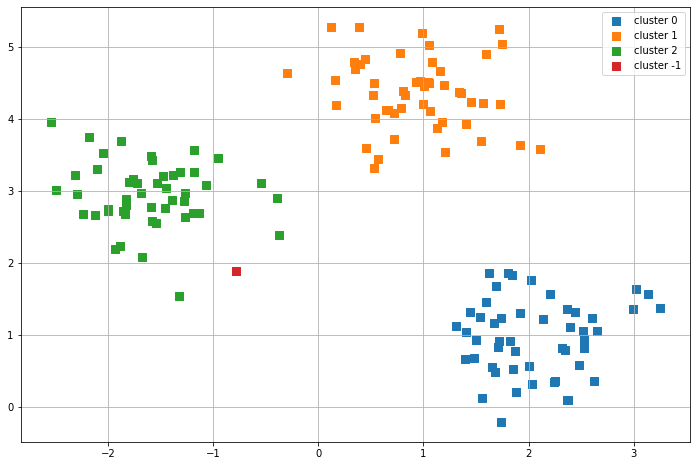

1.0 2


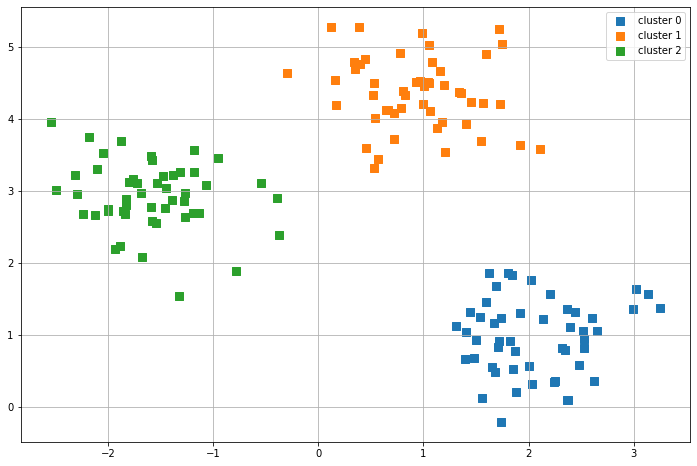

1.0 4


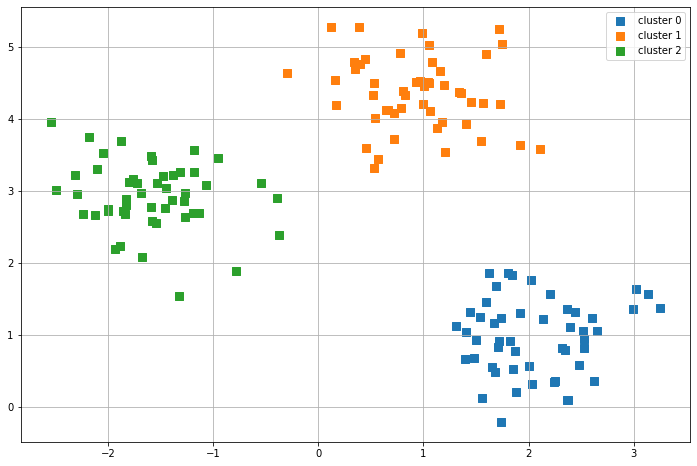

1.0 6


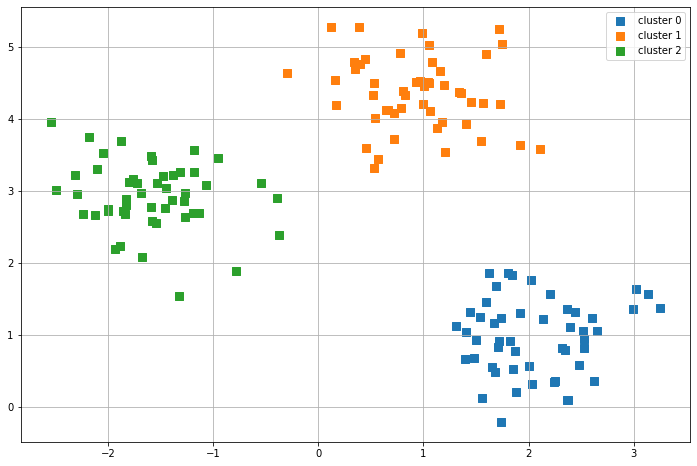

1.0 8


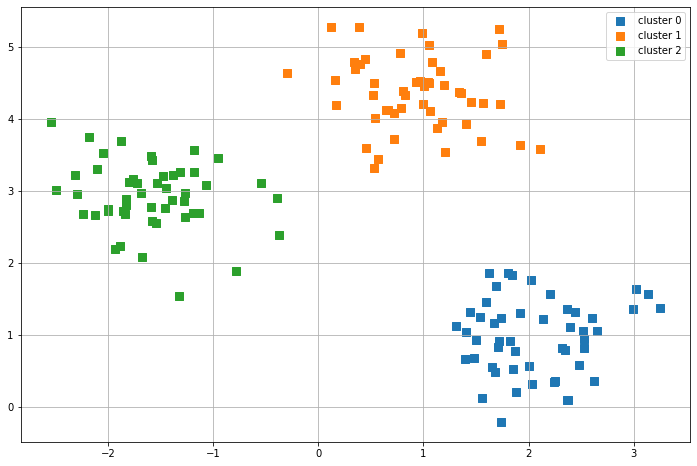

1.0 10


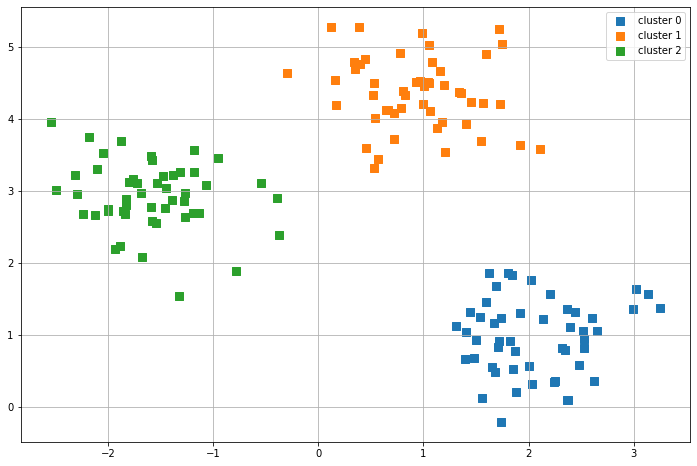

In [68]:
# loops over combinations and plot

for combination in combinations:
    eps, min_sample = combination
    db = DBSCAN(
        eps=eps,
        min_samples=min_sample,
        metric='euclidean')

    # fit + predict
    y_db = db.fit_predict(X)

    # plot DBSCAN clusters
    print(eps, min_sample)
    plot_clusters(X,y_db)


# 0.8 & 2-4 is best